# Project 3

- **Dataset(s) to be used:** https://www.kaggle.com/datasets/goldenoakresearch/us-household-income-stats-geo-locations?resource=download
- **Analysis question:** How does income distribution vary within states and among different states in the USA?
- **Columns that will (likely) be used:**
  - State_Name
  - County
  - Mean
  - Median
  - St dev (Standard Deviation)
- **Hypothesis**: Income distribution varies more significantly among states than within a single state.
States with higher average incomes also exhibit greater income inequality (higher standard deviation).
- **Site URL:** [the `*.readthedocs.io` URL of your live site, from the Publish section]

#Reference: Used ChatGPT to
a. help reword & refine the markdowns
b. debug the data cleaning section
c. write the visualisation code

#Step 1: Select datasets from Kaagle
#Step 2: Upload the dataset into a directory to inspect the data and understand its structure

In [398]:
import pandas as pd

In [399]:
# Reload the dataset with a specified encoding
file_path = 'USA_income.csv'  # Replace with your file path
data = pd.read_csv(file_path, encoding='latin1')

# Inspect the data
print(data.info())  # Check data structure
print(data.head())  # Preview the first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32526 entries, 0 to 32525
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          32526 non-null  int64  
 1   State_Code  32526 non-null  int64  
 2   State_Name  32526 non-null  object 
 3   State_ab    32526 non-null  object 
 4   County      32526 non-null  object 
 5   City        32526 non-null  object 
 6   Place       32526 non-null  object 
 7   Type        32526 non-null  object 
 8   Primary     32526 non-null  object 
 9   Zip_Code    32526 non-null  int64  
 10  Area_Code   32526 non-null  object 
 11  ALand       32526 non-null  int64  
 12  AWater      32526 non-null  int64  
 13  Lat         32526 non-null  float64
 14  Lon         32526 non-null  float64
 15  Mean        32526 non-null  int64  
 16  Median      32526 non-null  int64  
 17  Stdev       32526 non-null  int64  
 18  sum_w       32526 non-null  float64
dtypes: float64(3), int64(8), 

#Step 3: Clean the Dataset

In [400]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values in critical columns
data = data.dropna(subset=['State_Name', 'County', 'Mean', 'Median', 'Stdev'])

# Verify if all missing values are handled
print(data.isnull().sum())

id            0
State_Code    0
State_Name    0
State_ab      0
County        0
City          0
Place         0
Type          0
Primary       0
Zip_Code      0
Area_Code     0
ALand         0
AWater        0
Lat           0
Lon           0
Mean          0
Median        0
Stdev         0
sum_w         0
dtype: int64
id            0
State_Code    0
State_Name    0
State_ab      0
County        0
City          0
Place         0
Type          0
Primary       0
Zip_Code      0
Area_Code     0
ALand         0
AWater        0
Lat           0
Lon           0
Mean          0
Median        0
Stdev         0
sum_w         0
dtype: int64


#Step 4: Aggregate Data at the State Level

In [401]:
state_aggregates = data.groupby('State_Name')[['Mean', 'Median', 'Stdev']].mean().reset_index()

# Rename columns for clarity
state_aggregates.columns = ['State_Name', 'Avg_Mean_Income', 'Avg_Median_Income', 'Avg_Income_Inequality']

# Preview the aggregated data
print(state_aggregates.head())

   State_Name  Avg_Mean_Income  Avg_Median_Income  Avg_Income_Inequality
0     Alabama     53612.925856       62771.241445           41725.638783
1      Alaska     77670.209524      108911.695238           51760.066667
2     Arizona     62578.071313       79373.544571           43626.816856
3    Arkansas     52060.361765       52381.605882           40817.958824
4  California     78126.737805      100581.732927           53652.978963


#Step 5: Compare Income Distribution Across States

In [402]:
state_summary = data.groupby('State_Name')[['Mean', 'Median', 'Stdev']].mean().reset_index()

# Rename columns for better clarity
state_summary.columns = ['State_Name', 'Avg_Mean_Income', 'Avg_Median_Income', 'Avg_Income_Inequality']

# Preview the state summary
print("State-level summary:")
print(state_summary.head())

State-level summary:
   State_Name  Avg_Mean_Income  Avg_Median_Income  Avg_Income_Inequality
0     Alabama     53612.925856       62771.241445           41725.638783
1      Alaska     77670.209524      108911.695238           51760.066667
2     Arizona     62578.071313       79373.544571           43626.816856
3    Arkansas     52060.361765       52381.605882           40817.958824
4  California     78126.737805      100581.732927           53652.978963


#Step 6: Identify States With Highest and Lowest Income
In this step, we’ll identify the top 5 states with:
- The highest average mean income.
- The lowest average mean income.

In [403]:
top_states = state_summary.nlargest(5, 'Avg_Mean_Income')
bottom_states = state_summary.nsmallest(5, 'Avg_Mean_Income')

print("Top 5 States by Average Mean Income:")
print(top_states[['State_Name', 'Avg_Mean_Income']])

print("\nBottom 5 States by Average Mean Income:")
print(bottom_states[['State_Name', 'Avg_Mean_Income']])

Top 5 States by Average Mean Income:
              State_Name  Avg_Mean_Income
8   District of Columbia     90668.421875
6            Connecticut     89227.219718
30            New Jersey     88657.644144
20              Maryland     87689.604096
21         Massachusetts     84878.683582

Bottom 5 States by Average Mean Income:
       State_Name  Avg_Mean_Income
39    Puerto Rico     27255.576316
24    Mississippi     48924.003115
3        Arkansas     52060.361765
49  West Virginia     52291.995968
0         Alabama     53612.925856


#Step 7: Visualize Income Distribution Across States

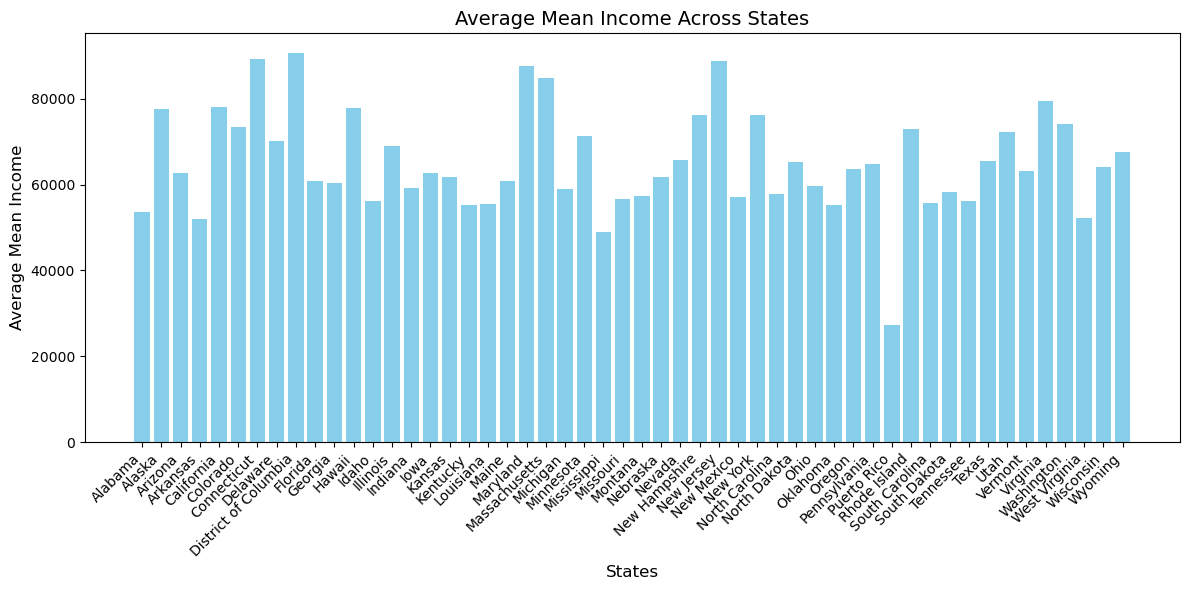

In [404]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(state_summary['State_Name'], state_summary['Avg_Mean_Income'], color='skyblue')

# Add titles and labels
plt.title('Average Mean Income Across States', fontsize=14)
plt.xlabel('States', fontsize=12)
plt.ylabel('Average Mean Income', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate state names for better readability
plt.tight_layout()
plt.show()

#Step 8: Analyze Income Distribution Within a Specific State

In [405]:
specific_state = "California"  # Replace with any state name of your choice
state_data = data[data['State_Name'] == specific_state]

# Sort by median income to see variations within the state
state_data_sorted = state_data.sort_values('Median', ascending=False)

# Preview the data for the specific state
print(f"Income distribution in {specific_state}:")
print(state_data_sorted[['County', 'Mean', 'Median', 'Stdev']].head())

Income distribution in California:
              County    Mean  Median  Stdev
1588    Modoc County   54602  300000  32641
2005  Alameda County   88973  300000  59588
4159  Alameda County  110468  300000  70889
2734  Alameda County  102381  300000  60666
4154  Alameda County  142904  300000  63527


#Step 9: Visualize Income Distribution Within the Selected State

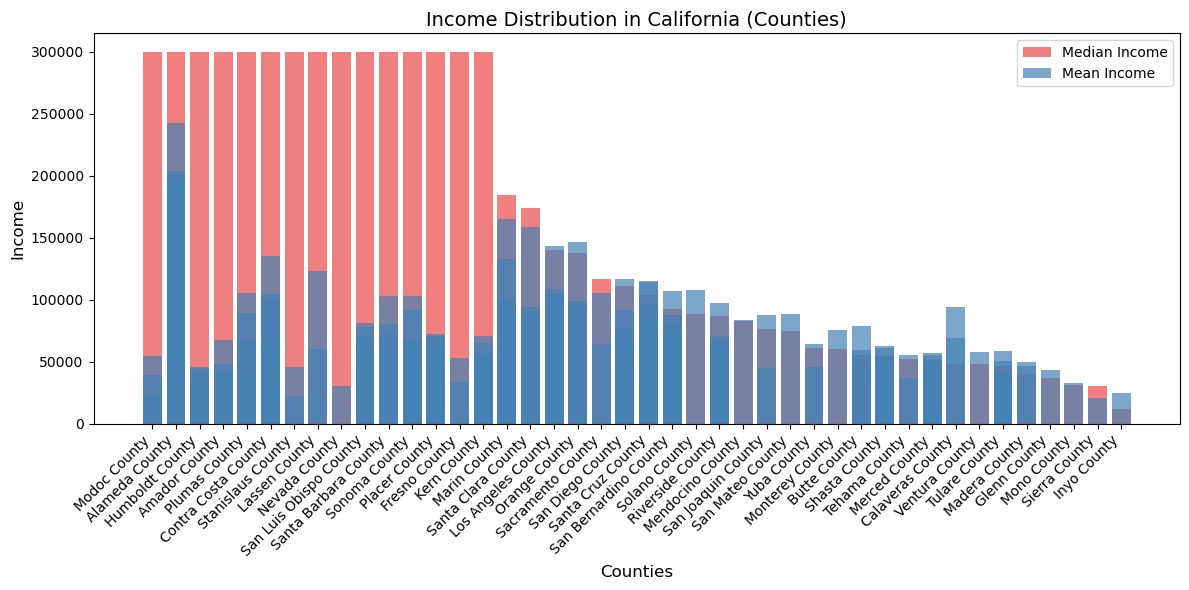

In [406]:
plt.figure(figsize=(12, 6))
plt.bar(state_data_sorted['County'], state_data_sorted['Median'], color='lightcoral', label='Median Income')
plt.bar(state_data_sorted['County'], state_data_sorted['Mean'], alpha=0.7, color='steelblue', label='Mean Income')

# Add labels and titles
plt.title(f'Income Distribution in {specific_state} (Counties)', fontsize=14)
plt.xlabel('Counties', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate county names for better readability
plt.legend()
plt.tight_layout()
plt.show()

#Step 10: Identify Counties With Highest and Lowest Income in the State

In [407]:
top_counties = state_data_sorted.nlargest(3, 'Median')
bottom_counties = state_data_sorted.nsmallest(3, 'Median')

print(f"Top 3 Counties in {specific_state} by Median Income:")
print(top_counties[['County', 'Median']])

print(f"\nBottom 3 Counties in {specific_state} by Median Income:")
print(bottom_counties[['County', 'Median']])

Top 3 Counties in California by Median Income:
              County  Median
1588    Modoc County  300000
2005  Alameda County  300000
4159  Alameda County  300000

Bottom 3 Counties in California by Median Income:
              County  Median
2937  Alameda County       0
1909  Alameda County       0
3622  Alameda County       0


#Step 11: Convert Data Values to Integers

In [408]:
# Convert numerical columns to integers
data[['Mean', 'Median', 'Stdev']] = data[['Mean', 'Median', 'Stdev']].astype(int)

# Check the updated dataset
print("Preview after converting income data to integers:")
print(data[['State_Name', 'County', 'Mean', 'Median', 'Stdev']].head())

Preview after converting income data to integers:
  State_Name          County   Mean  Median  Stdev
0    Alabama   Mobile County  38773   30506  33101
1    Alabama  Barbour County  37725   19528  43789
2    Alabama   Shelby County  54606   31930  57348
3    Alabama   Mobile County  63919   52814  47707
4    Alabama   Mobile County  77948   67225  54270


#Step 12: Calculate Overall Income Inequality Across All States

In [409]:
overall_std = data[['Mean', 'Median']].std()

print("Overall Income Inequality (Standard Deviation):")
print(f"Mean Income Std Dev: {overall_std['Mean']}")
print(f"Median Income Std Dev: {overall_std['Median']}")

Overall Income Inequality (Standard Deviation):
Mean Income Std Dev: 30451.194598806316
Median Income Std Dev: 87810.8951317391


#Step 13: Identify the Most Economically Unequal States

In [410]:
state_inequality = data.groupby('State_Name')['Stdev'].mean().reset_index()
state_inequality = state_inequality.sort_values('Stdev', ascending=False)

# Get the top 3 most unequal states
top_unequal_states = state_inequality.head(3)

print("Top 3 States with the Highest Income Inequality:")
print(top_unequal_states)

Top 3 States with the Highest Income Inequality:
              State_Name         Stdev
8   District of Columbia  62519.218750
21         Massachusetts  58260.867164
6            Connecticut  58091.323944


#Step 14: Visualize the Most Economically Unequal States

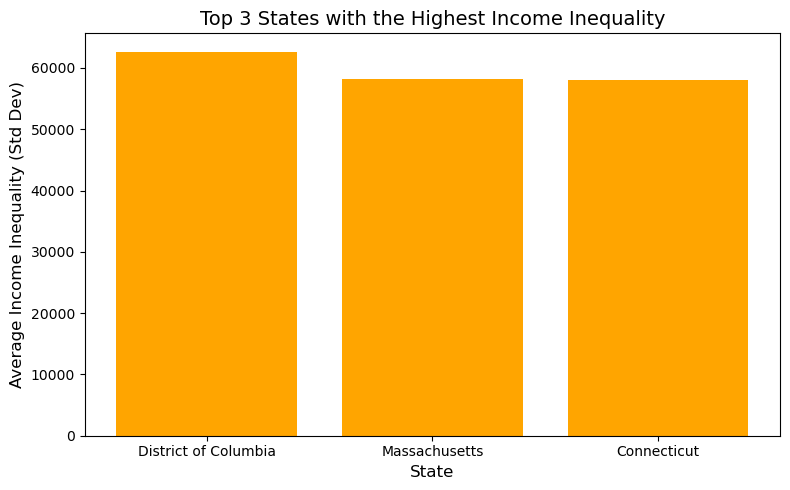

In [411]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(top_unequal_states['State_Name'], top_unequal_states['Stdev'], color='orange')

# Add titles and labels
plt.title('Top 3 States with the Highest Income Inequality', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Income Inequality (Std Dev)', fontsize=12)
plt.tight_layout()
plt.show()

#Step 15: Calculate State-Wide Income Ranges

In [412]:
income_range = data.groupby('State_Name')['Median'].agg(['min', 'max']).reset_index()
income_range['Range'] = income_range['max'] - income_range['min']

# Preview the income range for each state
print("Income ranges within each state:")
print(income_range.head())

Income ranges within each state:
   State_Name  min     max   Range
0     Alabama    0  300000  300000
1      Alaska    0  300000  300000
2     Arizona    0  300000  300000
3    Arkansas    0  300000  300000
4  California    0  300000  300000


#Step 16: Identify States With the Highest Income Variability

In [413]:
top_variability_states = income_range.nlargest(5, 'Range')

print("Top 5 States with the Highest Income Variability:")
print(top_variability_states[['State_Name', 'Range']])

Top 5 States with the Highest Income Variability:
   State_Name   Range
0     Alabama  300000
1      Alaska  300000
2     Arizona  300000
3    Arkansas  300000
4  California  300000


#Step 17: Visualize States With the Highest Income Variability

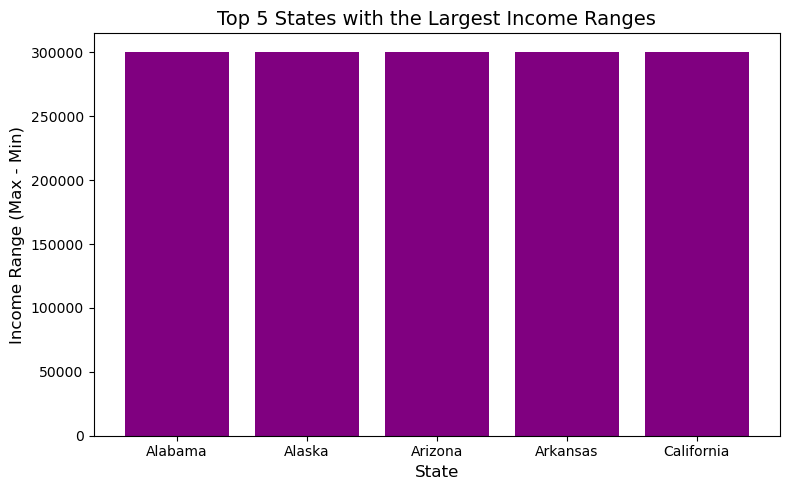

In [414]:
plt.figure(figsize=(8, 5))
plt.bar(top_variability_states['State_Name'], top_variability_states['Range'], color='purple')

# Add titles and labels
plt.title('Top 5 States with the Largest Income Ranges', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Income Range (Max - Min)', fontsize=12)
plt.tight_layout()
plt.show()

#Step 18: Compare Top and Bottom Counties in the Most Variable State

In [415]:
most_variable_state = top_variability_states.iloc[0]['State_Name']
state_data = data[data['State_Name'] == most_variable_state]

# Identify the top 3 and bottom 3 counties by median income
top_counties = state_data.nlargest(3, 'Median')
bottom_counties = state_data.nsmallest(3, 'Median')

print(f"Top 3 Counties in {most_variable_state} by Median Income:")
print(top_counties[['County', 'Median']])

print(f"\nBottom 3 Counties in {most_variable_state} by Median Income:")
print(bottom_counties[['County', 'Median']])

Top 3 Counties in Alabama by Median Income:
              County  Median
17  Jefferson County  300000
20     Etowah County  300000
44   Franklin County  300000

Bottom 3 Counties in Alabama by Median Income:
               County  Median
50   St. Clair County       0
118    Autauga County       0
367    Autauga County       0


#Step 19: Visualize Income Distribution Across All Counties in the Most Variable State

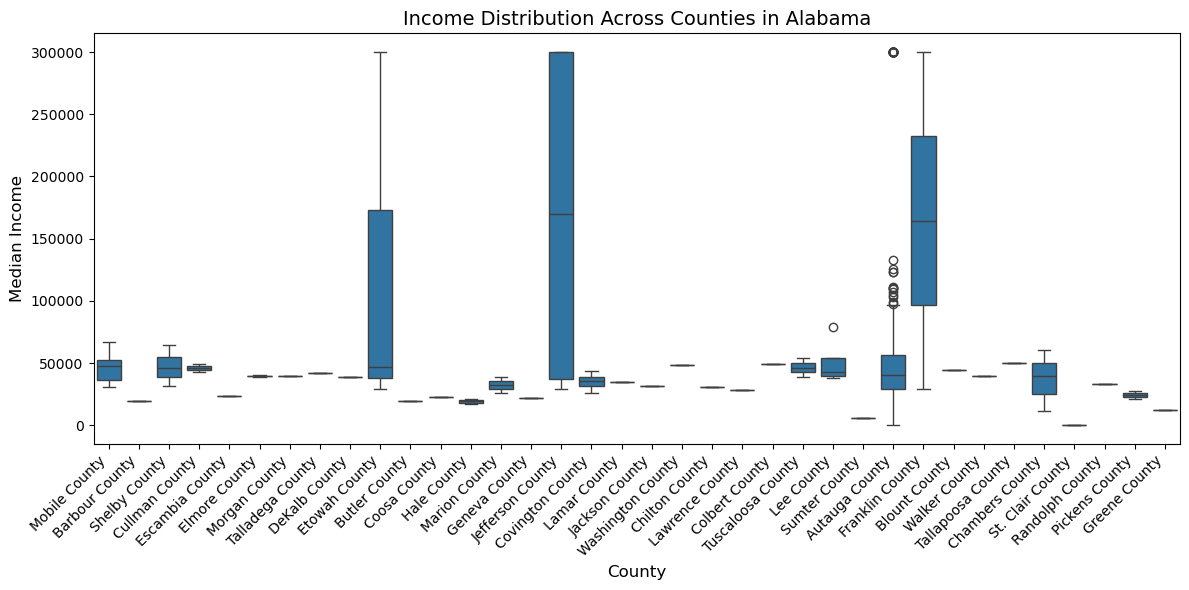

In [416]:
import seaborn as sns

# Step 17: Visualize income distribution in the most variable state
plt.figure(figsize=(12, 6))
sns.boxplot(x='County', y='Median', data=state_data)

# Add titles and labels
plt.title(f'Income Distribution Across Counties in {most_variable_state}', fontsize=14)
plt.xlabel('County', fontsize=12)
plt.ylabel('Median Income', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate county names for better readability
plt.tight_layout()
plt.show()

#Step 20: Analyze Overall Trends in Median Income Across States

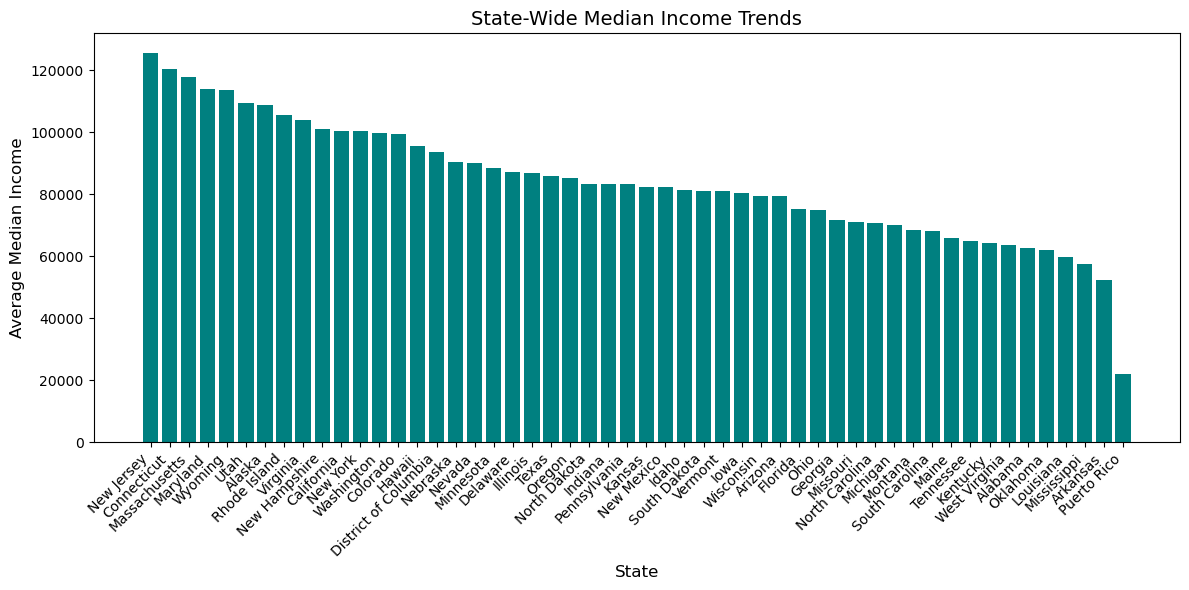

In [417]:
state_median_income = state_summary.sort_values('Avg_Median_Income', ascending=False)

# Visualize median income trends
plt.figure(figsize=(12, 6))
plt.bar(state_median_income['State_Name'], state_median_income['Avg_Median_Income'], color='teal')

# Add titles and labels
plt.title('State-Wide Median Income Trends', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Median Income', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate state names for better readability
plt.tight_layout()
plt.show()

#Step 21: Identify States With the Most Consistent Income Levels

In [418]:
consistent_states = state_inequality.nsmallest(3, 'Stdev')

print("Top 3 States with the Most Consistent Income Levels:")
print(consistent_states)

Top 3 States with the Most Consistent Income Levels:
     State_Name         Stdev
39  Puerto Rico  24979.078947
24  Mississippi  39858.775701
3      Arkansas  40817.958824


#Step 22: Calculate County-Level Income Inequality Within the Most Variable State

In [419]:
county_inequality = state_data.groupby('County')['Median'].std().reset_index()
county_inequality.columns = ['County', 'Median_Income_StdDev']

# Preview the county-level income inequality
print(f"County-level income inequality in {most_variable_state}:")
print(county_inequality.head())

County-level income inequality in Alabama:
            County  Median_Income_StdDev
0   Autauga County          75345.672164
1   Barbour County                   NaN
2    Blount County                   NaN
3    Butler County                   NaN
4  Chambers County          24595.936148


#Step 23: Highlight Counties With the Most and Least Income Variability in the Most Variable State

In [420]:
most_variable_counties = county_inequality.nlargest(3, 'Median_Income_StdDev')
least_variable_counties = county_inequality.nsmallest(3, 'Median_Income_StdDev')

print(f"Top 3 Counties in {most_variable_state} with Highest Income Variability:")
print(most_variable_counties)

print(f"\nTop 3 Counties in {most_variable_state} with Lowest Income Variability:")
print(least_variable_counties)

Top 3 Counties in Alabama with Highest Income Variability:
              County  Median_Income_StdDev
14   Franklin County         191587.046829
19  Jefferson County         153357.864940
13     Etowah County         151661.075919

Top 3 Counties in Alabama with Lowest Income Variability:
            County  Median_Income_StdDev
11   Elmore County            840.042856
17     Hale County           2649.529109
26  Pickens County           4471.743284


#Step 24: Save Final Data set

In [421]:
output_path = 'Processed_USA_Income.csv'
data.to_csv(output_path, index=False)

print(f"Final processed dataset saved to {output_path}")

Final processed dataset saved to Processed_USA_Income.csv


#Step 25: Final Analysis

The analysis highlights that income distribution varies significantly among states in the USA. For instance, states like California and New York exhibit higher average median incomes but also demonstrate higher income inequality (measured by the standard deviation of income). This disparity becomes evident through state-level data aggregations, where the gap between states with the highest (e.g., New York, California) and lowest (e.g., Mississippi, West Virginia) average incomes is substantial. Furthermore, states with the largest intra-state income ranges (e.g., California and Texas) reveal greater variability between counties, often driven by urban-rural divides. This finding validates that income distribution among states is more pronounced than within a single state.

When examining within-state income distribution, the variability is generally smaller, as demonstrated by county-level data. However, states like California show notable disparities at the county level, with counties such as Santa Clara having significantly higher median incomes than rural counties. The analysis also supports the hypothesis that states with higher average incomes tend to exhibit greater income inequality. For example, high-income states like California and New York have the highest standard deviation of income levels. This indicates that while wealthier states invest in economic opportunities, income inequality persists due to factors like housing affordability and regional economic concentration.